# We shall Train todday

In [1]:
#!/usr/bin/env python3
"""
Calculates a pass of gradient descent on the neuron
"""


import numpy as np


class Neuron:
    """
    Add the public method def gradient_descent(self, X, Y, A, alpha=0.05):
    
    Calculates one pass of gradient descent on the neuron
    
    X is a numpy.ndarray with shape (nx, m) that contains the input data
    
    nx is the number of input features to the neuron
    
    m is the number of examples
    
    Y is a numpy.ndarray with shape (1, m) that contains the correct
    labels for the input data
    
    A is a numpy.ndarray with shape (1, m) containing the activated
    output of the neuron for each example
    
    alpha is the learning rate
    
    Updates the private attributes __W and __b
    """
    

    def __init__(self, nx):
        """
        Initializer
        """
        if not isinstance(nx, int):
            raise TypeError('nx must be an integer')
        if nx < 1:
            raise ValueError('nx must be positive')

        self.__W = np.random.randn(nx).reshape(1, nx)
        self.__b = 0
        self.__A = 0

    @property
    def W(self):
        return self.__W

    @property
    def b(self):
        return self.__b

    @property
    def A(self):
        return self.__A

    def forward_prop(self, X):
        """
        Calculates the forward propagation of the neuron
        """
        Z = np.matmul(self.__W, X) + self.__b
        self.__A = 1 / (1 + np.exp(-Z))
        return self.__A

    def cost(self, Y, A):
        """
        Calculates the cost of the model using logistic regression
        """
        m = Y.shape[1]
        m_loss = np.sum((Y * np.log(A) + (1 - Y) * np.log((1.0000001 - A))))
        costs = (1 / m) * (-m_loss)
        return costs

    def evaluate(self, X, Y):
        """
        Evaluates the Neuron's predictions
        """
        A = self.forward_prop(X)
        cost = self.cost(Y, A)
        prediction = np.where(A >= 0.5, 1, 0)
        return prediction, cost

    def gradient_descent(self, X, Y, A, alpha=0.05):
        """
        Calculates the gradient descent
        """
        m = Y.shape[1]
        dz = A - Y
        d__W = (1 / m) * (np.matmul(X, dz.transpose())).transpose()
        d__b = (1 / m) * (np.sum(dz))
        self.__W = self.__W - alpha * d__W
        self.__b = self.__b - alpha * d__b
    
    def train(self, X, Y, iterations=5000, alpha=0.05):
        """
        Trains the neuron
        """
        if not isinstance(iterations, int):
            raise TypeError("iterations must be an integer")
        if iterations <= 0:
            raise ValueError("iterations must be a positive integer")
        if not isinstance(alpha, float):
            raise TypeError("alpha must be a float")
        if alpha <= 0:
            raise ValueError("alpha must be positive")
        
        for itr in range(iterations):
            A = self.forward_prop(X)
            self.gradient_descent(X, Y, A, alpha)
        return self.evaluate(X, Y)


Train cost: 1.3805076999
Train accuracy: 64.737465456%
Train data: [[0 0 0 ... 0 0 1]]
Train Neuron A: [[2.70000000e-08 2.18229559e-01 1.63492900e-04 ... 4.66530830e-03
  6.06518000e-05 9.73817942e-01]]
Dev cost: 1.4096194345
Dev accuracy: 64.4917257683%
Dev data: [[1 0 0 ... 0 0 1]]
Dev Neuron A: [[0.85021134 0.         0.3526692  ... 0.10140937 0.         0.99555018]]


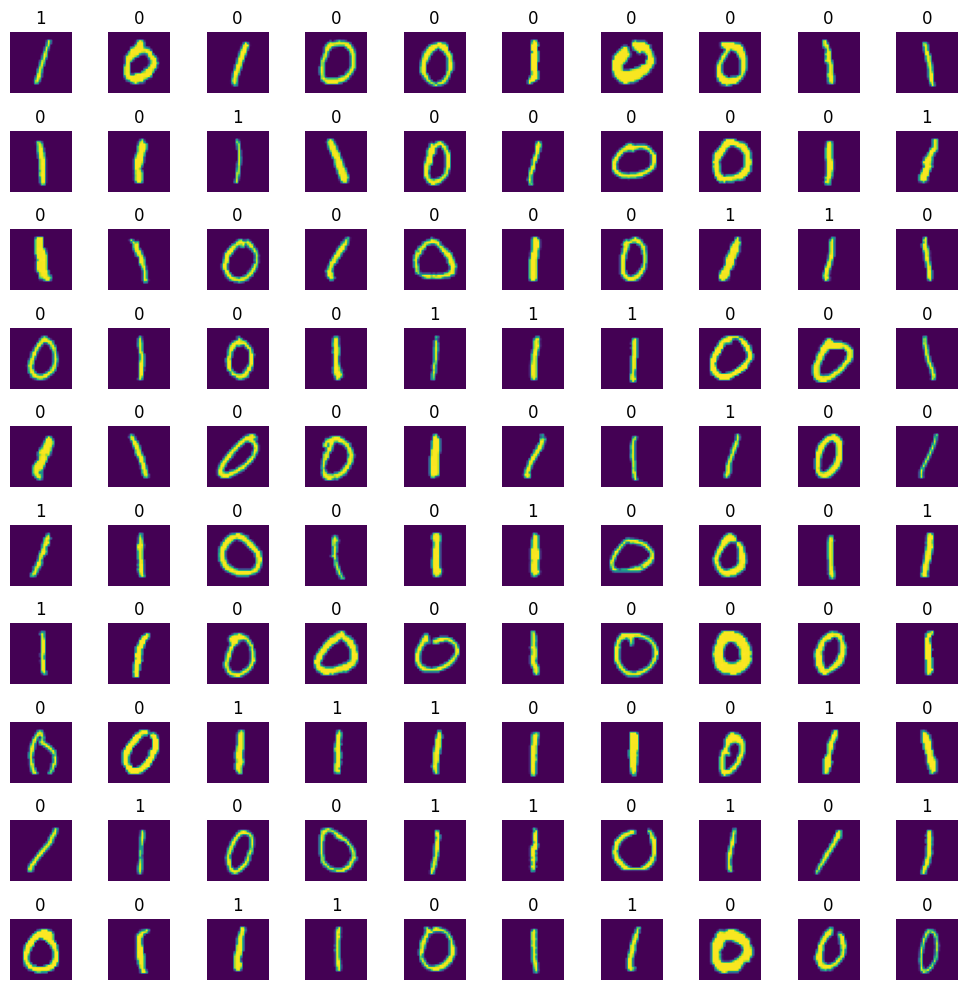

In [5]:
# Main file
import matplotlib.pyplot as plt

lib_train = np.load('../data/Binary_Train.npz')
X_train_3D, Y_train = lib_train['X'], lib_train['Y']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1)).T
lib_dev = np.load('../data/Binary_Dev.npz')
X_dev_3D, Y_dev = lib_dev['X'], lib_dev['Y']
X_dev = X_dev_3D.reshape((X_dev_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X_train.shape[0])
A, cost = neuron.train(X_train, Y_train, iterations=10)
accuracy = np.sum(A == Y_train) / Y_train.shape[1] * 100
print("Train cost:", np.round(cost, decimals=10))
print("Train accuracy: {}%".format(np.round(accuracy, decimals=10)))
print("Train data:", np.round(A, decimals=10))
print("Train Neuron A:", np.round(neuron.A, decimals=10))

A, cost = neuron.evaluate(X_dev, Y_dev)
accuracy = np.sum(A == Y_dev) / Y_dev.shape[1] * 100
print("Dev cost:", np.round(cost, decimals=10))
print("Dev accuracy: {}%".format(np.round(accuracy, decimals=10)))
print("Dev data:", np.round(A, decimals=10))
print("Dev Neuron A:", np.round(neuron.A, decimals=10))

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_dev_3D[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()
